<a href="https://colab.research.google.com/github/EmiLaPiola/TP-automatico-/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Subí el archivo "dataset.zip"
uploaded = files.upload()

# Descomprimir en el directorio actual
with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall(".")  # Extrae "dataset_enviar/" en raíz

# Mostrar contenido de la carpeta extraída
print("Contenido de 'dataset_enviar':")
print(os.listdir("dataset_enviar"))


# Paso 2: Descomprimir "dataset.zip", que contiene la carpeta "dataset_enviar"

zip_path = "dataset.zip"  # Nombre del archivo que subiste

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # Extrae la carpeta "dataset_enviar" dentro del entorno


# Paso 3: Verificar el contenido descomprimido (opcional)
print("Contenido de la carpeta datasetFinal:")
print(os.listdir("datasetFinal"))

# Paso 4: Cargar grafo e instancias

# Cargar el grafo
grafo = pd.read_csv("datasetFinal/grafo.csv", header=None)

# Cargar las 10 instancias
instancias = {}
for i in range(1, 11):
    path = f"datasetFinal/instancia{i}.csv"
    instancias[i] = pd.read_csv(path, header=None)



Nodos: 2160 | Arcos: 10194


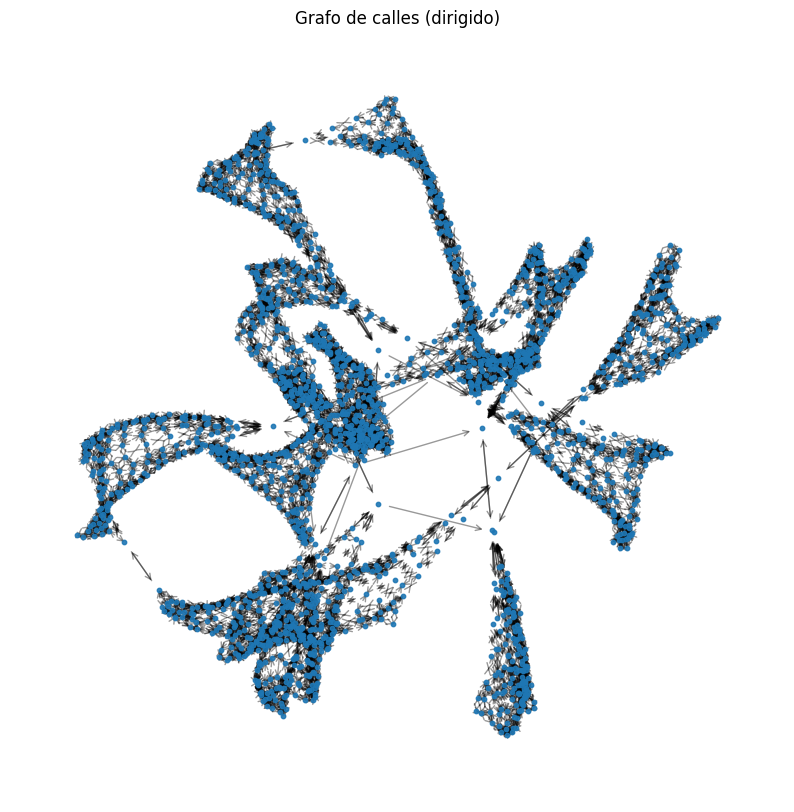

In [ ]:


# Ruta corregida
GRAFO_PATH = "dataset_enviar/grafo.csv"

# Cargar arcos: columnas (i, j, c_ij)
df_g = pd.read_csv(GRAFO_PATH, header=None, names=["u", "v", "w"])

# Crear grafo dirigido con pesos
G = nx.DiGraph()
for _, row in df_g.iterrows():
    G.add_edge(int(row.u), int(row.v), w=float(row.w))

print(f"Nodos: {G.number_of_nodes()} | Arcos: {G.number_of_edges()}")

# Layout (no basado en coordenadas geográficas)
pos = nx.spring_layout(G, seed=33)

# Dibujar el grafo
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color="#1f77b4", alpha=0.9)
# nx.draw_networkx_labels(G, pos, font_size=8)  # Descomentar si querés ver los números de nodo

plt.title("Grafo de calles (dirigido)")
plt.axis("off")
plt.show()


# Veamos como es la *instancia 1*

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


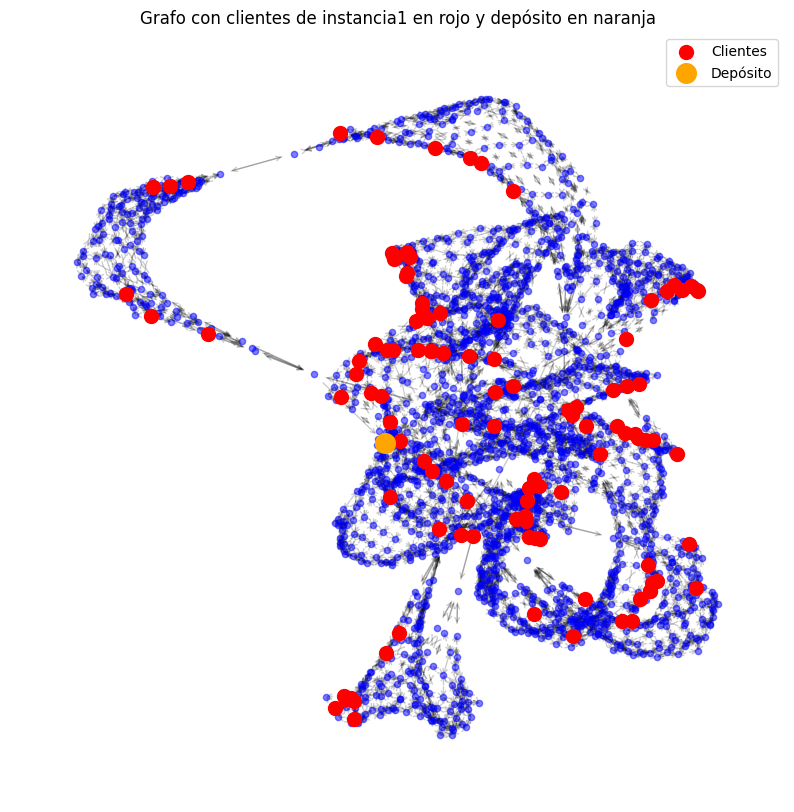

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- Paths corregidos ---
GRAFO_PATH = "dataset_enviar/grafo.csv"
INST_PATH = "dataset_enviar/instancia1.csv"
DEPOT = 0  # nodo de la empresa

# --- Cargar grafo ---
df_g = pd.read_csv(GRAFO_PATH, header=None, names=["u","v","w"])
G = nx.DiGraph()
for _, row in df_g.iterrows():
    G.add_edge(int(row.u), int(row.v), w=float(row.w))

# --- Cargar clientes (hogares) ---
df_inst = pd.read_csv(INST_PATH, header=None, names=["home","radius"])
clientes = df_inst["home"].astype(int).tolist()

# --- Layout del grafo (si no hay coordenadas reales) ---
pos = nx.spring_layout(G, seed=42)

# --- Dibujo ---
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_size=20, node_color="blue", alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=clientes, node_size=100, node_color="red", label="Clientes")
if DEPOT in G.nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[DEPOT], node_size=200, node_color="orange", label="Depósito")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=8, alpha=0.2)

plt.title("Grafo con clientes de instancia1 en rojo y depósito en naranja")
plt.axis("off")
plt.legend()
plt.show()


# Grafiquemos todas las instancias a ver que odna


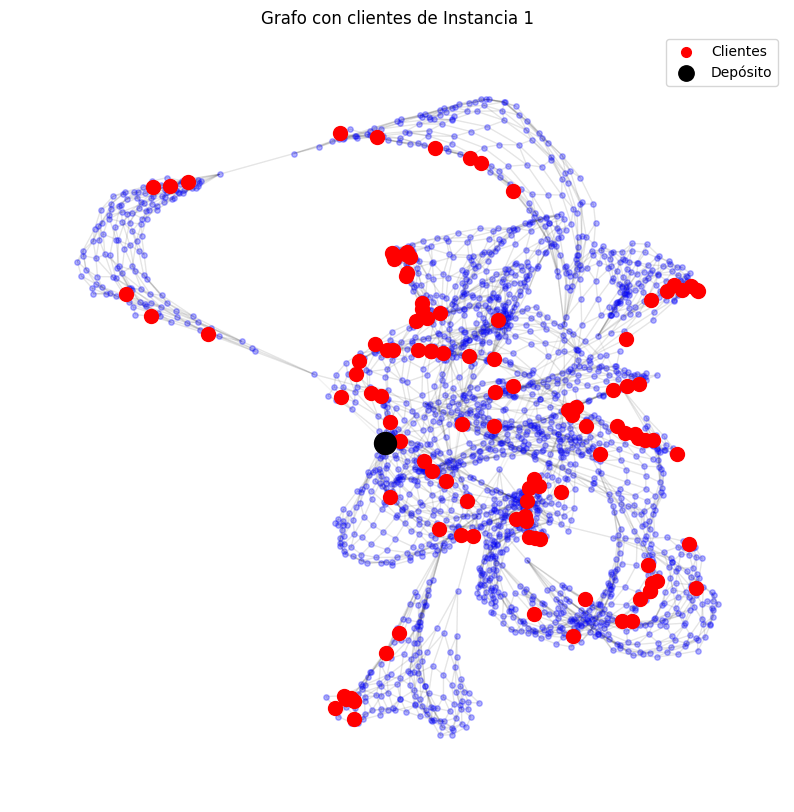

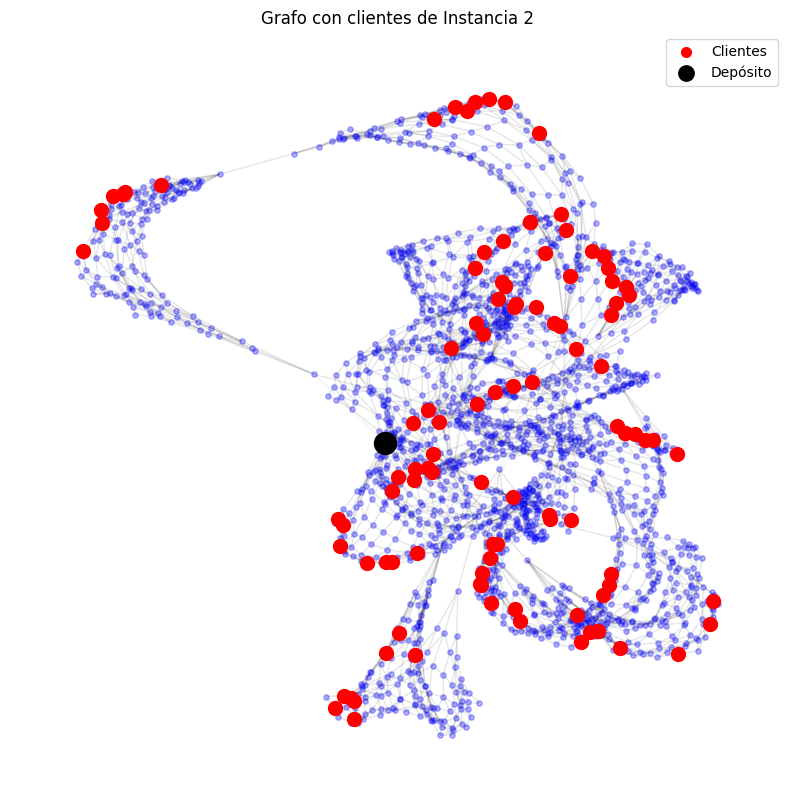

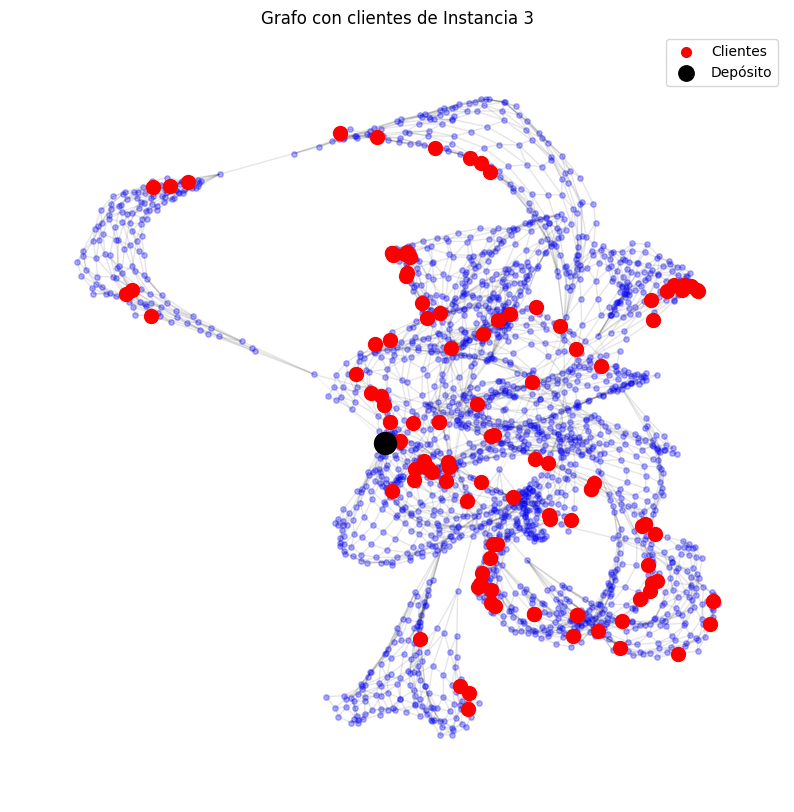

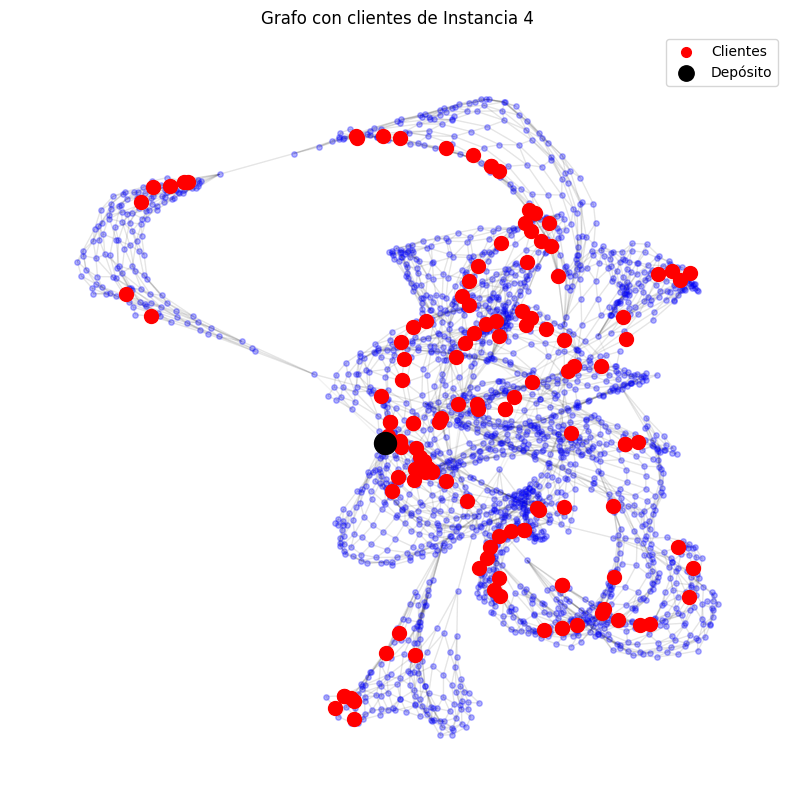

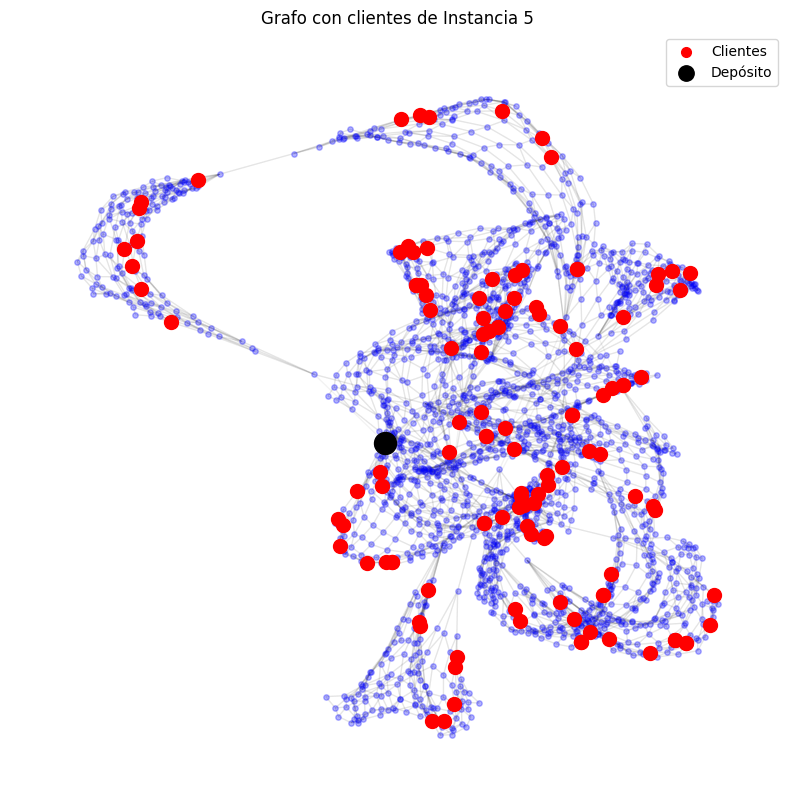

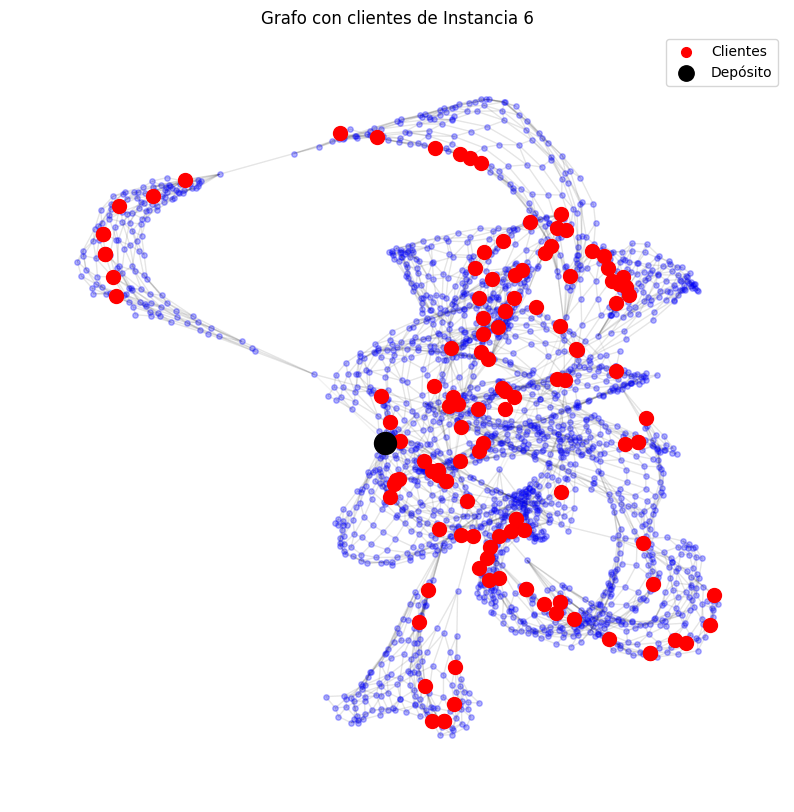

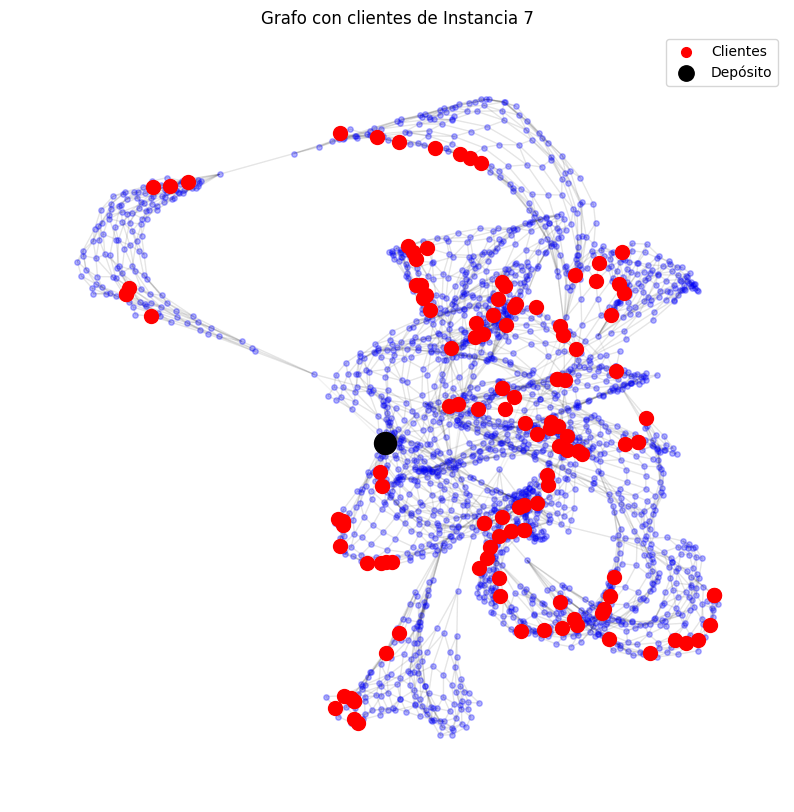

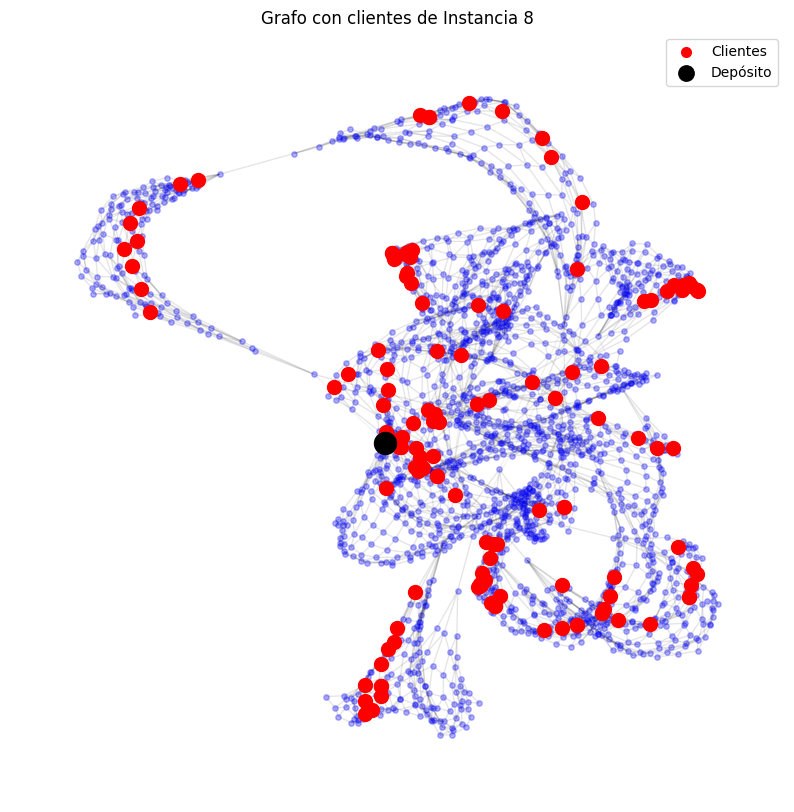

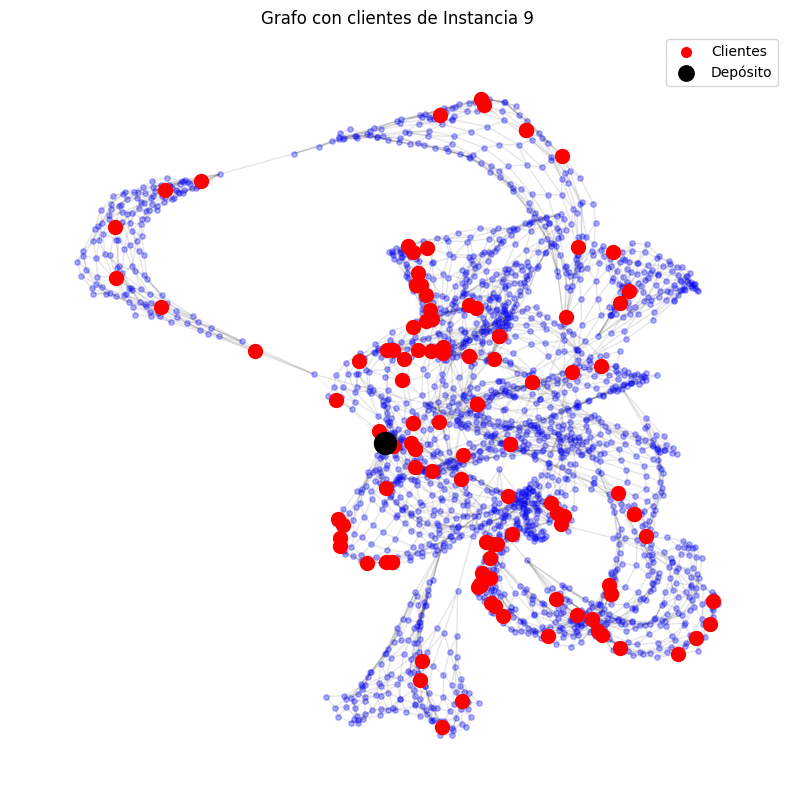

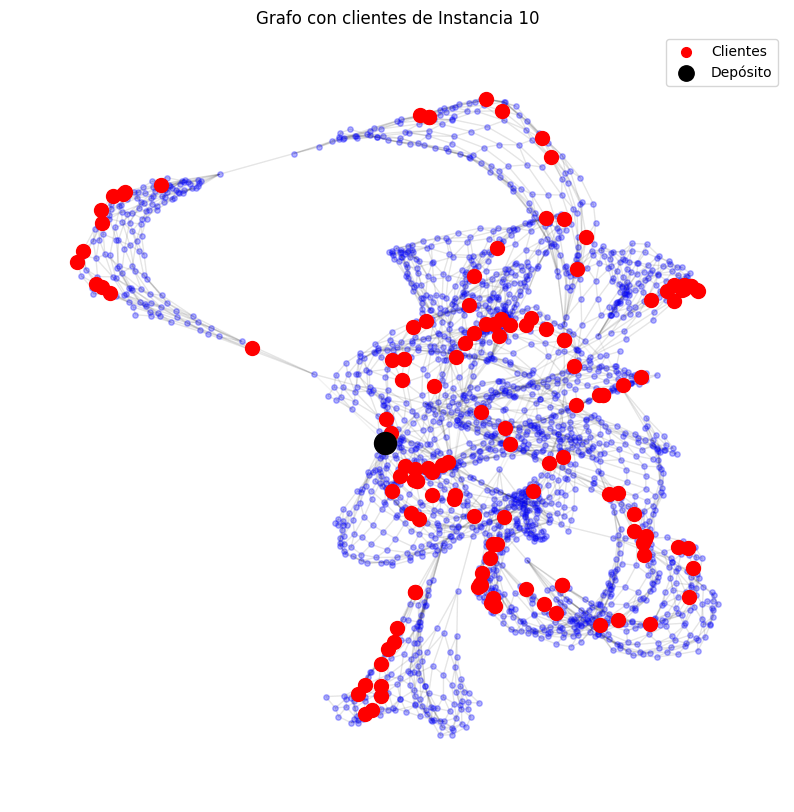

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- Paths corregidos ---
GRAFO_PATH = "dataset_enviar/grafo.csv"
DEPOT = 0  # nodo de la empresa

# --- Cargar grafo ---
df_g = pd.read_csv(GRAFO_PATH, header=None, names=["u","v","w"])
G = nx.DiGraph()
for _, row in df_g.iterrows():
    G.add_edge(int(row.u), int(row.v), w=float(row.w))

# --- Layout (mismo para todos los gráficos) ---
pos = nx.spring_layout(G, seed=42)

# --- Generar 10 gráficos ---
for i in range(1, 11):
    inst_path = f"dataset_enviar/instancia{i}.csv"  #
    df_inst = pd.read_csv(inst_path, header=None, names=["home", "radius"])
    clientes = df_inst["home"].astype(int).tolist()

    plt.figure(figsize=(10, 10))

    # Fondo: grafo completo
    nx.draw_networkx_edges(G, pos, alpha=0.05, arrows=False)
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color="blue", alpha=0.3)

    # Clientes en rojo
    nx.draw_networkx_nodes(G, pos, nodelist=clientes, node_size=100, node_color="red", label="Clientes")

    # Depósito
    nx.draw_networkx_nodes(G, pos, nodelist=[DEPOT], node_size=250, node_color="black", label="Depósito")

    plt.title(f"Grafo con clientes de Instancia {i}")
    plt.axis("off")
    plt.legend(markerscale=0.7)
    plt.show()


# IDEA PRINCIPAL : “ Vamos a la casa del trabajador más cercano ”:


La heurística de construcción planteada:

- Arrancamos en el depósito (nodo 0).

- Buscamos el trabajador más cercano al nodo actual (con Dijkstra).

- Recorremos el camino más corto válido hasta su casa, lo agregamos a la ruta y sumamos ese costo para ver al final cuanto nos costo todo el viaje.

- Marcamos al trabajador como atendido y repetimos desde esa casa hacia el siguiente más cercano.

- Al final la combi vuelve al depósito.


Porque creemos que es clave:

- Hacemos un recorrido greedy: simplemente usamos Dijkstra desde el nodo actual y elegimos al cliente más cercano.

- Simple de mejorar después con 2-opt, simulated annealing, etc.

- Si despues lo combinamos con "solo ir a nodos desde los que el cliente puede caminar", podemos dejar de visitar una casa exacta y en cambio pasar por un nodo dentro de su ri.


# Fase de construcción (armar una solución inicial).

Trabajadores totales: 107
Levantados: 107
Costo total (suma de w): 16903.994
Ruta (nodos):
[0, 192, 1237, 1364, 162, 369, 204, 275, 799, 828, 2150, 1717, 1201, 1239, 1120, 747, 1226, 1323, 1672, 409, 692, 1324, 2042, 535, 536, 2102, 1278, 1976, 1278, 1008, 1329, 1356, 628, 901, 111, 1072, 364, 1087, 620, 53, 1098, 1073, 1885, 922, 1848, 1075, 989, 879, 126, 137, 358, 31, 331, 264, 561, 405, 1082, 1294, 740, 886, 71, 382, 100, 1983, 1304, 477, 1699, 1705, 788, 1394, 929, 139, 980, 1108, 1959, 2025, 1981, 490, 590, 1389, 368, 1936, 516, 1033, 22, 1780, 198, 348, 871, 339, 1188, 113, 1321, 678, 507, 948, 749, 1489, 2001, 1431, 1804, 727, 1224, 1427, 241, 354, 889, 1876, 1413, 1632, 77, 1533, 1078, 78, 629, 378, 644, 539, 673, 568, 2047, 1736, 1143, 1568, 30, 2134, 1527, 168, 688, 92, 2058, 503, 1504, 966, 1805, 1333, 846, 971, 2104, 1050, 404, 1284, 1691, 1819, 723, 1083, 723, 532, 363, 296, 716, 1633, 1908, 362, 956, 101, 494, 1214, 1957, 851, 423, 841, 1491, 718, 36, 757, 865, 1433, 145

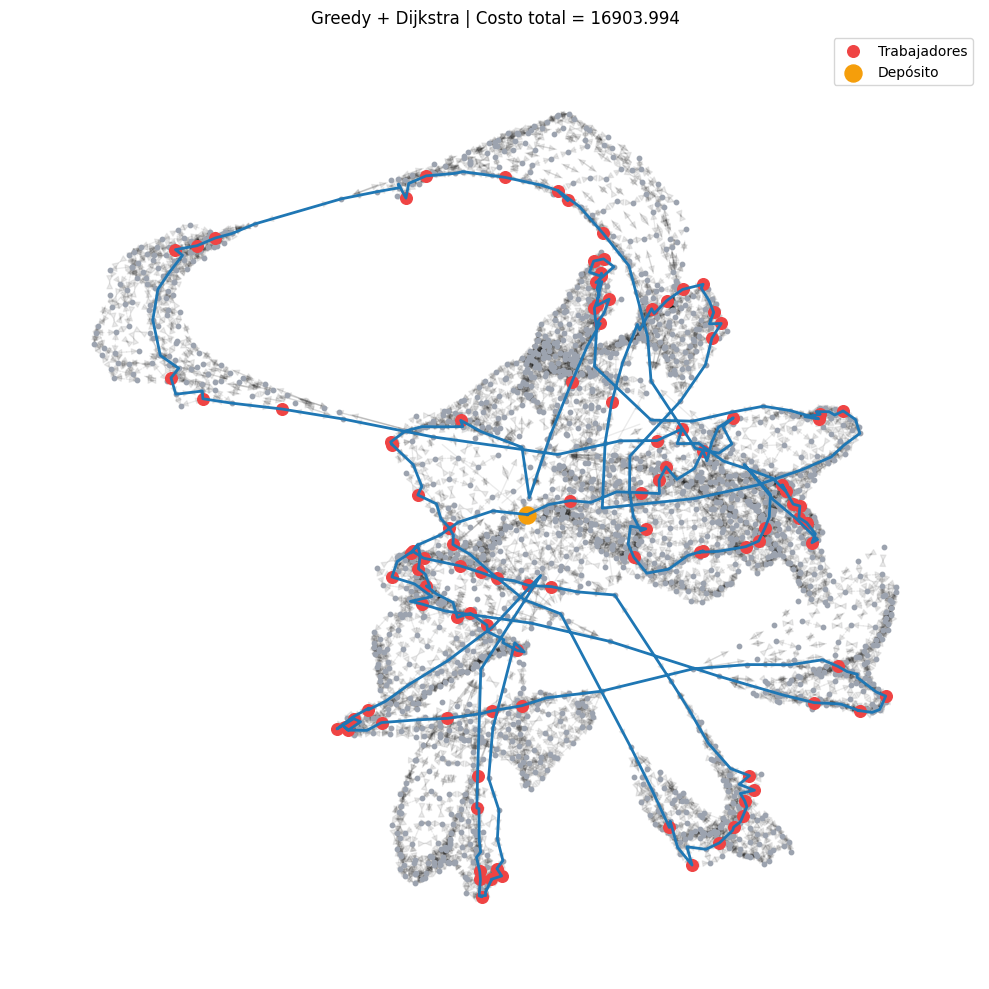

In [ ]:

"""
Greedy + Dijkstra (solo pesos):
- En cada iteración corre Dijkstra con corte temprano hasta el trabajador no visitado más barato.
- Concatena el camino mínimo válido y acumula el costo total.
- Al final, vuelve al depósito.
- Guarda resultados en CSV, PNG, y resultados1.txt (formato requerido).

Entradas:
  dataset_enviar/grafo.csv
  dataset_enviar/instancia1.csv

Salidas:
  ruta_dijkstra.csv
  segmentos_dijkstra.csv
  ruta_dijkstra.png (opcional)
  resultados1.txt
"""

import heapq
import random
import pandas as pd
from collections import defaultdict

# ---------------- Config ----------------
GRAFO_PATH = "dataset_enviar/grafo.csv"
INST_PATH  = "dataset_enviar/instancia1.csv"
DEPOT = 0
IS_DIRECTED = True
RETURN_TO_DEPOT = True
TIE_BREAK_RANDOM = True

HOME_COLS = ["home", "hogar", "node", "nodo", "cliente", "vi"]  # nombres posibles

# ---------------- Utilidades ----------------
def pick_col(df, candidates, alias="home"):
    for c in candidates:
        if c in df.columns:
            return c
    raise ValueError(f"No se encontró columna para {alias}. Columnas: {list(df.columns)}")

def build_adj_with_weights(path, directed=True):
    df = pd.read_csv(path, header=None, names=["u", "v", "w"])
    adj = defaultdict(list)
    wmap = {}
    for _, r in df.iterrows():
        u, v, w = int(r.u), int(r.v), float(r.w)
        adj[u].append(v)
        wmap[(u, v)] = w
        if not directed:
            adj[v].append(u)
            wmap[(v, u)] = w
    return adj, wmap

def dijkstra_early(adj, wmap, src, targets_set):
    heap = [(0.0, src)]
    dist = {src: 0.0}
    parent = {src: None}
    best_cost = None
    found_targets = []

    while heap:
        du, u = heapq.heappop(heap)
        if du != dist[u]:
            continue
        if best_cost is not None and du > best_cost + 1e-12:
            break
        if u in targets_set:
            if best_cost is None:
                best_cost = du
            found_targets.append(u)
        for v in adj.get(u, []):
            nd = du + wmap[(u, v)]
            if v not in dist or nd < dist[v] - 1e-12:
                dist[v] = nd
                parent[v] = u
                heapq.heappush(heap, (nd, v))

    if not found_targets:
        return None, None, None

    target = random.choice(found_targets) if (TIE_BREAK_RANDOM and len(found_targets) > 1) else found_targets[0]

    path = []
    cur = target
    while cur is not None:
        path.append(cur)
        cur = parent[cur]
    path.reverse()
    return target, path, best_cost

# ---------------- Carga ----------------
adj, wmap = build_adj_with_weights(GRAFO_PATH, directed=IS_DIRECTED)

df_inst = pd.read_csv(INST_PATH, header=None, names=["home", "radius"])
home_col = pick_col(df_inst, HOME_COLS, alias="nodo del trabajador")
workers = [int(x) for x in df_inst[home_col].tolist()]
workers = [w for w in workers if w != DEPOT]
workers_set = set(workers)

if DEPOT not in adj and DEPOT not in workers_set:
    raise ValueError(f"El depósito {DEPOT} no existe en el grafo.")

# ---------------- Heurística ----------------
remaining = set(workers_set)
route = [DEPOT]
segments = []
unreachable = []

current = DEPOT
total_cost = 0.0

while remaining:
    target, path, seg_cost = dijkstra_early(adj, wmap, current, remaining)
    if target is None:
        unreachable.extend(sorted(list(remaining)))
        break
    route.extend(path[1:])
    segments.append({
        "from": current,
        "to": target,
        "segment_cost": float(seg_cost),
        "nodes": " ".join(map(str, path))
    })
    total_cost += float(seg_cost)
    remaining.remove(target)
    current = target

# Volver al depósito
if RETURN_TO_DEPOT:
    target, path, seg_cost = dijkstra_early(adj, wmap, current, {DEPOT})
    if target is not None:
        route.extend(path[1:])
        segments.append({
            "from": current,
            "to": DEPOT,
            "segment_cost": float(seg_cost),
            "nodes": " ".join(map(str, path))
        })
        total_cost += float(seg_cost)

# ---------------- Reporte y guardado ----------------
print(f"Trabajadores totales: {len(workers_set)}")
print(f"Levantados: {len(workers_set) - len(unreachable)}")
if unreachable:
    print(f"Inalcanzables: {sorted(unreachable)}")
print(f"Costo total (suma de w): {total_cost:.3f}")
print("Ruta (nodos):")
print(route)

# Formato pedido: resultados1.txt
with open("resultados1.txt", "w") as f:
    f.write(" ".join(map(str, route)))
print("Guardado: resultados1.txt")

# CSVs para análisis y debugging
pd.DataFrame({"step": range(len(route)), "node": route}).to_csv("ruta_dijkstra.csv", index=False)
pd.DataFrame(segments).to_csv("segmentos_dijkstra.csv", index=False)
print("Guardado: ruta_dijkstra.csv")
print("Guardado: segmentos_dijkstra.csv")

# ---------------- (Opcional) gráfico ----------------
try:
    import networkx as nx
    import matplotlib.pyplot as plt
    Gx = nx.DiGraph() if IS_DIRECTED else nx.Graph()
    for u, neighs in adj.items():
        for v in neighs:
            Gx.add_edge(u, v, w=wmap[(u, v)])
    pos = nx.spring_layout(Gx, seed=42)
    plt.figure(figsize=(10,10))
    nx.draw_networkx_edges(Gx, pos, alpha=0.08, arrows=IS_DIRECTED)
    nx.draw_networkx_nodes(Gx, pos, node_size=10, node_color="#9CA3AF")
    nx.draw_networkx_nodes(Gx, pos, nodelist=list(workers_set), node_size=70, node_color="#EF4444", label="Trabajadores")
    nx.draw_networkx_nodes(Gx, pos, nodelist=[DEPOT], node_size=150, node_color="#F59E0B", label="Depósito")

    xs = [pos[n][0] for n in route if n in pos]
    ys = [pos[n][1] for n in route if n in pos]
    plt.plot(xs, ys, linewidth=2)

    plt.title(f"Greedy + Dijkstra | Costo total = {total_cost:.3f}")
    plt.axis("off")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.savefig("ruta_dijkstra.png", dpi=180)
    print("Guardado: ruta_dijkstra.png")
except Exception:
    print("No se pudo graficar la ruta.")


# Fase de mejora


Armamos una matriz D(i,j) que coresponde que el trabajador i se puede mover a la casa del tranajador j . Para luego en la fase de mejora ver si las modificaiones del recorrido podemos cambiar algo ...  

En lugar de buscar directamente al hogar del trabajador, buscás cualquier nodo j \in V tal que:
- D(i,j) = 1 (el trabajador puede llegar caminando)
- Y ese nodo j esté en el grafo y sea alcanzable por la van
Entonces, en cada iteración:
- Para cada trabajador no atendido, obtenés su conjunto de nodos caminables.
- Buscás el nodo más barato (usando Dijkstra desde el nodo actual de la van) entre todos esos nodos.
- Elegís el trabajador cuyo nodo caminable sea más barato de alcanzar.
- Lo marcás como atendido y agregás ese nodo a la ruta.
Esto te permite atender a trabajadores sin ir directamente a su casa, lo cual puede reducir mucho el costo total.


In [96]:

# CON CAMINATA INCLUIDA


import heapq
import random
import pandas as pd
from collections import defaultdict




# ---------------- Config ----------------
GRAFO_PATH = "dataset_enviar/grafo.csv"
INST_PATH  = "dataset_enviar/instancia1.csv"
DEPOT = 0
IS_DIRECTED = True
RETURN_TO_DEPOT = True
TIE_BREAK_RANDOM = True

HOME_COLS = ["home", "hogar", "node", "nodo", "cliente", "vi"]  # nombres posibles

# ---------------- Utilidades ----------------
def pick_col(df, candidates, alias="home"):
    for c in candidates:
        if c in df.columns:
            return c
    raise ValueError(f"No se encontró columna para {alias}. Columnas: {list(df.columns)}")

def build_adj_with_weights(path, directed=True):
    df = pd.read_csv(path, header=None, names=["u", "v", "w"])
    adj = defaultdict(list)
    wmap = {}
    for _, r in df.iterrows():
        u, v, w = int(r.u), int(r.v), float(r.w)
        adj[u].append(v)
        wmap[(u, v)] = w
        if not directed:
            adj[v].append(u)
            wmap[(v, u)] = w
    return adj, wmap

def bfs_radius(adj, wmap, start, radius):
    """Devuelve todos los nodos alcanzables desde start con distancia <= radius."""
    heap = [(0.0, start)]
    dist = {start: 0.0}
    result = set()
    while heap:
        d, u = heapq.heappop(heap)
        if d > radius + 1e-12:
            continue
        result.add(u)
        for v in adj.get(u, []):
            nd = d + wmap[(u, v)]
            if v not in dist or nd < dist[v] - 1e-12:
                dist[v] = nd
                heapq.heappush(heap, (nd, v))
    return result

def dijkstra_to_any(adj, wmap, src, target_nodes):
    heap = [(0.0, src)]
    dist = {src: 0.0}
    parent = {src: None}
    best_cost = None
    found_targets = []

    while heap:
        du, u = heapq.heappop(heap)
        if du != dist[u]:
            continue
        if best_cost is not None and du > best_cost + 1e-12:
            break
        if u in target_nodes:
            if best_cost is None:
                best_cost = du
            found_targets.append(u)
        for v in adj.get(u, []):
            nd = du + wmap[(u, v)]
            if v not in dist or nd < dist[v] - 1e-12:
                dist[v] = nd
                parent[v] = u
                heapq.heappush(heap, (nd, v))

    if not found_targets:
        return None, None, None

    chosen = random.choice(found_targets) if (TIE_BREAK_RANDOM and len(found_targets) > 1) else found_targets[0]

    path = []
    cur = chosen
    while cur is not None:
        path.append(cur)
        cur = parent[cur]
    path.reverse()
    return chosen, path, best_cost

# ---------------- Carga ----------------
adj, wmap = build_adj_with_weights(GRAFO_PATH, directed=IS_DIRECTED)

df_inst = pd.read_csv(INST_PATH, header=None, names=["home", "radius"])
home_col = pick_col(df_inst, HOME_COLS, alias="nodo del trabajador")
workers_info = [(int(r[home_col]), float(r["radius"])) for _, r in df_inst.iterrows()]
workers_info = [(h, r) for h, r in workers_info if h != DEPOT]

# Precalcular nodos válidos para cada trabajador
worker_to_nodes = {}
for home, rad in workers_info:
    worker_to_nodes[home] = bfs_radius(adj, wmap, home, rad)

remaining_workers = set(worker_to_nodes.keys())
route = [DEPOT]
segments = []
unreachable = []

current = DEPOT
total_cost = 0.0

while remaining_workers:
    # Construir conjunto de nodos válidos para trabajadores restantes
    candidate_nodes = set()
    node_to_worker = {}
    for w in remaining_workers:
        for n in worker_to_nodes[w]:
            candidate_nodes.add(n)
            node_to_worker[n] = w  # último trabajador que puede usar ese nodo (si varios, se sobrescribe)

    target_node, path, seg_cost = dijkstra_to_any(adj, wmap, current, candidate_nodes)
    if target_node is None:
        unreachable.extend(sorted(list(remaining_workers)))
        break

    route.extend(path[1:])
    segments.append({
        "from": current,
        "to": target_node,
        "segment_cost": float(seg_cost),
        "nodes": " ".join(map(str, path))
    })
    total_cost += float(seg_cost)

    # Marcar el trabajador atendido
    attended_worker = node_to_worker[target_node]
    remaining_workers.remove(attended_worker)
    current = target_node

# Regresar al depósito
if RETURN_TO_DEPOT:
    target, path, seg_cost = dijkstra_to_any(adj, wmap, current, {DEPOT})
    if target is not None:
        route.extend(path[1:])
        segments.append({
            "from": current,
            "to": DEPOT,
            "segment_cost": float(seg_cost),
            "nodes": " ".join(map(str, path))
        })
        total_cost += float(seg_cost)

# ---------------- Reporte ----------------
print(f"Trabajadores totales: {len(worker_to_nodes)}")
print(f"Levantados: {len(worker_to_nodes) - len(unreachable)}")
if unreachable:
    print(f"Inalcanzables: {sorted(unreachable)}")
print(f"Costo total (suma de w): {total_cost:.3f}")
print("Ruta (nodos):")
print(route)

# Guardar resultados
with open("resultados1.txt", "w") as f:
    f.write(" ".join(map(str, route)))
pd.DataFrame({"step": range(len(route)), "node": route}).to_csv("ruta_dijkstra.csv", index=False)
pd.DataFrame(segments).to_csv("segmentos_dijkstra.csv", index=False)

Trabajadores totales: 107
Levantados: 107
Costo total (suma de w): 16914.706
Ruta (nodos):
[0, 192, 1237, 1364, 162, 369, 204, 275, 799, 828, 2150, 1717, 1201, 1239, 1120, 747, 1226, 1323, 1672, 409, 692, 1324, 2042, 535, 536, 2102, 1278, 1976, 1278, 1008, 1329, 1356, 628, 901, 111, 1072, 364, 1087, 620, 53, 1098, 1073, 1885, 922, 1848, 1075, 989, 879, 126, 137, 358, 31, 331, 264, 561, 405, 1082, 1294, 740, 886, 71, 382, 100, 1983, 1304, 477, 1699, 1705, 788, 929, 139, 980, 1108, 1959, 2025, 1959, 775, 1003, 1451, 1705, 1394, 929, 139, 1111, 1889, 490, 590, 1389, 368, 1936, 516, 1033, 22, 1780, 198, 348, 871, 339, 1188, 113, 1321, 678, 507, 948, 749, 1489, 2001, 1431, 1804, 727, 1224, 1427, 241, 354, 889, 1876, 1413, 1632, 77, 1533, 1078, 78, 629, 378, 644, 539, 673, 568, 2047, 1736, 1143, 1568, 30, 2134, 1527, 168, 688, 92, 2058, 503, 1504, 966, 1805, 1333, 846, 971, 2104, 1050, 404, 1284, 1691, 1819, 723, 1083, 723, 532, 363, 296, 716, 1633, 1908, 362, 956, 101, 494, 1214, 1957, 851,

Con esto, tu heurística:
- Atiende a trabajadores sin necesidad de ir a su casa exacta.
- Usa la caminata máxima r_i para ampliar las opciones de visita.
- Mantiene la eficiencia y aleatoriedad del enfoque original.
¿Querés que te ayude a integrar esto en tu archivo main.py completo o te gustaría que lo probemos con una instancia?


In [98]:
import heapq
import random
import pandas as pd
from collections import defaultdict

# Config
GRAFO_PATH = "dataset_enviar/grafo.csv"
INST_PATH  = "dataset_enviar/instancia1.csv"
DEPOT = 0
IS_DIRECTED = True
RETURN_TO_DEPOT = True
TIE_BREAK_RANDOM = True
HOME_COLS = ["home", "hogar", "node", "nodo", "cliente", "vi"]

# Utilidades
def pick_col(df, candidates, alias="home"):
    for c in candidates:
        if c in df.columns:
            return c
    raise ValueError(f"No se encontró columna para {alias}. Columnas: {list(df.columns)}")

def build_adj_with_weights(path, directed=True):
    df = pd.read_csv(path, header=None, names=["u", "v", "w"])
    adj = defaultdict(list)
    wmap = {}
    for _, r in df.iterrows():
        u, v, w = int(r.u), int(r.v), float(r.w)
        adj[u].append(v)
        wmap[(u, v)] = w
        if not directed:
            adj[v].append(u)
            wmap[(v, u)] = w
    return adj, wmap

def bfs_radius(adj, wmap, start, radius):
    heap = [(0.0, start)]
    dist = {start: 0.0}
    result = set()
    while heap:
        d, u = heapq.heappop(heap)
        if d > radius + 1e-12:
            continue
        result.add(u)
        for v in adj.get(u, []):
            nd = d + wmap[(u, v)]
            if v not in dist or nd < dist[v] - 1e-12:
                dist[v] = nd
                heapq.heappush(heap, (nd, v))
    return result

def dijkstra_to_any(adj, wmap, src, target_nodes):
    heap = [(0.0, src)]
    dist = {src: 0.0}
    parent = {src: None}
    best_cost = None
    found_targets = []

    while heap:
        du, u = heapq.heappop(heap)
        if du != dist[u]:
            continue
        if best_cost is not None and du > best_cost + 1e-12:
            break
        if u in target_nodes:
            if best_cost is None:
                best_cost = du
            found_targets.append(u)
        for v in adj.get(u, []):
            nd = du + wmap[(u, v)]
            if v not in dist or nd < dist[v] - 1e-12:
                dist[v] = nd
                parent[v] = u
                heapq.heappush(heap, (nd, v))

    if not found_targets:
        return None, None, None

    chosen = random.choice(found_targets) if (TIE_BREAK_RANDOM and len(found_targets) > 1) else found_targets[0]

    path = []
    cur = chosen
    while cur is not None:
        path.append(cur)
        cur = parent[cur]
    path.reverse()
    return chosen, path, best_cost

# Carga
adj, wmap = build_adj_with_weights(GRAFO_PATH, directed=IS_DIRECTED)
df_inst = pd.read_csv(INST_PATH, header=None, names=["home", "radius"])
home_col = pick_col(df_inst, HOME_COLS, alias="nodo del trabajador")
workers_info = [(int(r[home_col]), float(r["radius"])) for _, r in df_inst.iterrows()]
workers_info = [(h, r) for h, r in workers_info if h != DEPOT]

# Precalcular caminata
worker_to_nodes = {}
for home, rad in workers_info:
    nodes = bfs_radius(adj, wmap, home, rad)
    worker_to_nodes[home] = nodes
    print(f"Trabajador hogar {home}, radio {rad}, nodos caminables: {len(nodes)}")  # ver cuántos

remaining_workers = set(worker_to_nodes.keys())
route = [DEPOT]
segments = []
unreachable = []
current = DEPOT
total_cost = 0.0

while remaining_workers:
    candidate_nodes = set()
    node_to_workers = defaultdict(list)

    for w in remaining_workers:
        for n in worker_to_nodes[w]:
            candidate_nodes.add(n)
            node_to_workers[n].append(w)

    # Imprimir para debug
    print(f"\nIteration, current = {current}")
    print("Remaining_workers:", remaining_workers)
    sample_candidates = list(candidate_nodes)[:10]
    print("Algunos candidate_nodes:", sample_candidates)

    target_node, path, seg_cost = dijkstra_to_any(adj, wmap, current, candidate_nodes)
    if target_node is None:
        unreachable.extend(sorted(list(remaining_workers)))
        break

    print(f"Elegido target_node = {target_node}, distancia = {seg_cost}, para trabajadores {node_to_workers[target_node]}")

    route.extend(path[1:])
    segments.append({
        "from": current,
        "to": target_node,
        "segment_cost": float(seg_cost),
        "nodes": " ".join(map(str, path))
    })
    total_cost += float(seg_cost)
    current = target_node

    # Marcar todos los trabajadores posibles
    for w in node_to_workers[target_node]:
        if w in remaining_workers:
            remaining_workers.remove(w)

if RETURN_TO_DEPOT:
    t, path_back, cost_back = dijkstra_to_any(adj, wmap, current, {DEPOT})
    if t is not None:
        route.extend(path_back[1:])
        total_cost += float(cost_back)
        segments.append({
            "from": current,
            "to": DEPOT,
            "segment_cost": float(cost_back),
            "nodes": " ".join(map(str, path_back))
        })
        print(f"Volviendo al depósito desde {current} con costo {cost_back}")

print("\n--- Resultado final ---")
print(f"Trabajadores totales: {len(worker_to_nodes)}")
print(f"Atendidos: {len(worker_to_nodes) - len(unreachable)}")
if unreachable:
    print(f"Inalcanzables: {sorted(unreachable)}")
print(f"Costo total recorrido por la van: {total_cost:.3f}")
print("Ruta:", route)


Trabajador hogar 1237, radio 0.06, nodos caminables: 1
Trabajador hogar 275, radio 0.06, nodos caminables: 1
Trabajador hogar 799, radio 0.06, nodos caminables: 1
Trabajador hogar 1717, radio 0.06, nodos caminables: 1
Trabajador hogar 747, radio 0.06, nodos caminables: 1
Trabajador hogar 369, radio 0.03, nodos caminables: 1
Trabajador hogar 1976, radio 0.06, nodos caminables: 1
Trabajador hogar 1278, radio 0.06, nodos caminables: 1
Trabajador hogar 1329, radio 0.06, nodos caminables: 1
Trabajador hogar 901, radio 0.06, nodos caminables: 1
Trabajador hogar 1072, radio 0.06, nodos caminables: 1
Trabajador hogar 536, radio 0.03, nodos caminables: 1
Trabajador hogar 1885, radio 0.06, nodos caminables: 1
Trabajador hogar 922, radio 0.06, nodos caminables: 1
Trabajador hogar 1848, radio 0.06, nodos caminables: 1
Trabajador hogar 31, radio 0.06, nodos caminables: 1
Trabajador hogar 561, radio 0.06, nodos caminables: 1
Trabajador hogar 1082, radio 0.03, nodos caminables: 1
Trabajador hogar 382